# **Importação das Bibliotecas**

In [393]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, f1_score, auc
import tensorflow as tf

# **Importação do dataset**

In [394]:
# Carrega o arquivo do dataset para a sessão do notebook
dataset = pd.read_csv('/content/heart.csv')

# Todos os atributos menos o alvo, estão em X
X = dataset.iloc[:, :-1].values

# atributo alvo guardado em y
y = dataset.iloc[:, -1].values

In [395]:
# Mostra o total de entradas e o número de atributos: (303, 14)
dataset.shape

(303, 14)

In [396]:
# Exibe as primeiras linhas do dataset como exemplo
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [397]:
# Confirma inexistência de atributos não preenchidos
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [398]:
# Exibe o número de exemplos na classe positiva e negativa do atributo alvo. O dataset está bem balanceado.
print(dataset['output'].value_counts())

1    165
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribuição de valores do atributo alvo')

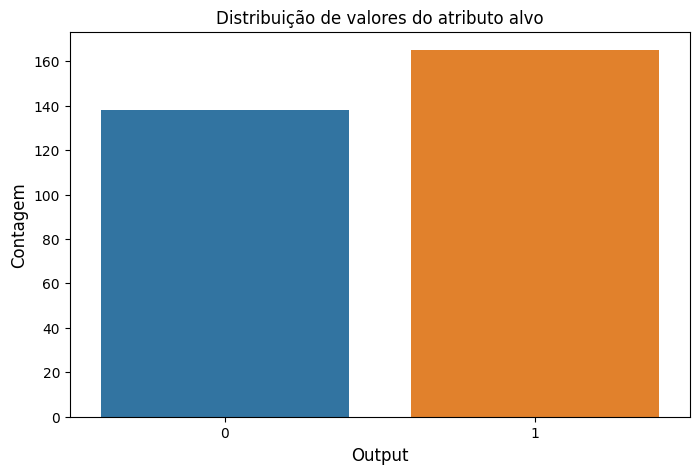

In [399]:
# Plota um gráfico de colunas com o valores do atributo alvo.
plt.figure(figsize = (8, 5))
sns.countplot(x = dataset['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Contagem", size = 12)
plt.title("Distribuição de valores do atributo alvo", size = 12)

# **Separando o dataset entre partição de treino e teste**

Text(0.5, 1.0, 'Distribuição de valores do atributo alvo no conjunto de teste')

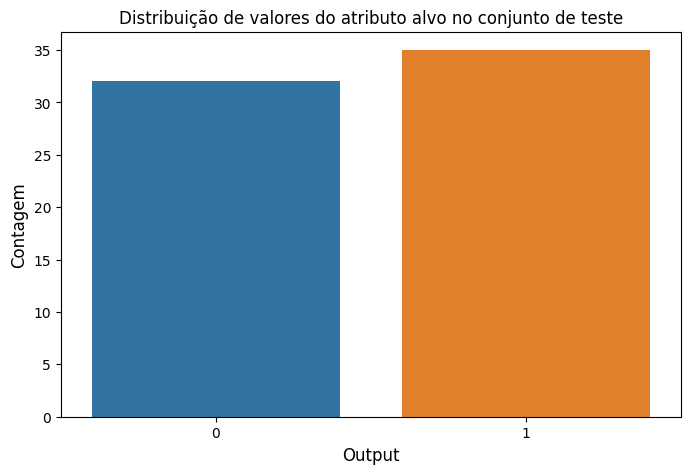

In [400]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 42)
plt.figure(figsize = (8, 5))
sns.countplot(x = y_test)
plt.xlabel("Output", size = 12)
plt.ylabel("Contagem", size = 12)
plt.title("Distribuição de valores do atributo alvo no conjunto de teste", size = 12)

# **Normalização dos valores dos atributos(Feature Scaling)**

In [401]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)

# **MLP**

In [402]:
# Inicializando a rede neural
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada intermediária
classifier.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Adicionando a segunda camada intermediária
classifier.add(tf.keras.layers.Dense(units=8, activation='relu'))

# Adicionando a camada de saída
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compilando a RNA MLP
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Treinando a rede neural
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6573 - accuracy: 0.5593
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.5975
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.6356
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.6441
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.6822
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.7288
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7542
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7500
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7669
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7712
Epoch 11/100
8/8 [===========

# **Aplicando o conjunto de teste no classificador MLP**

In [403]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 4ms/step
[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


# **Matriz de confusão**

In [404]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Acurácia = ",accuracy_score(y_test, y_pred))
print("F1       = ", f1_score(y_test, y_pred))

[[28  4]
 [ 4 31]]
Acurácia =  0.8805970149253731
F1       =  0.8857142857142857


# **Resultados da etapa de teste(gráfico)**

AUC(Área abaixo da curva) é 0.8803571428571428


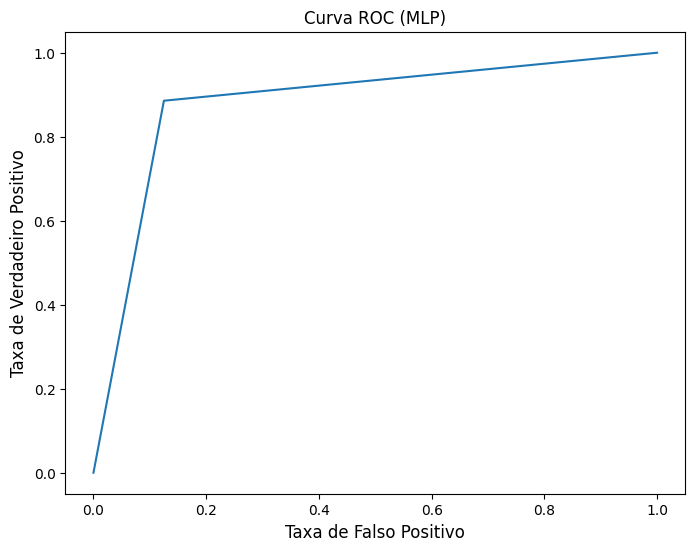

In [405]:
fpr, tpr, threshould = roc_curve(y_pred, y_test)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("Taxa de Falso Positivo", size = 12)
plt.ylabel("Taxa de Verdadeiro Positivo", size = 12)
plt.title("Curva ROC (MLP)", size = 12)
print("AUC(Área abaixo da curva) é {}".format(auc(fpr, tpr)))